<a href="https://colab.research.google.com/github/jansoe/AIHorizons24/blob/main/WordVectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Word Vectors

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gensim
from pprint import pprint
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

We can download pretrained word-vectors

In [2]:
import gensim.downloader as api
api.info()['models'].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

In [3]:
model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


### Visualisation of word vectors

In [4]:
def plot_vector(v):
    plt.subplots(figsize=(15,1))
    plt.imshow(v.reshape(1,-1), aspect='auto', cmap=plt.cm.Spectral, vmin=-.3, vmax=.3)
    _ = plt.colorbar()
    plt.yticks([])
    plt.xlabel('Neuron')

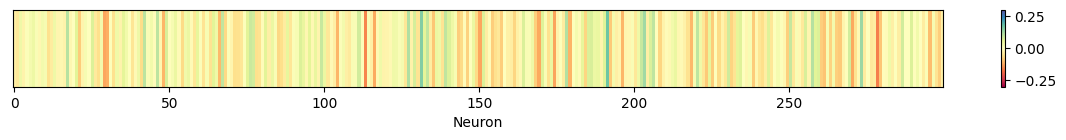

In [5]:
word_vector1 = model.get_vector('noodles', norm=True)
plot_vector(word_vector1)

## Word similarities

If words are semantically similar, their word vectors are similar

Text(0, 0.5, 'shoe')

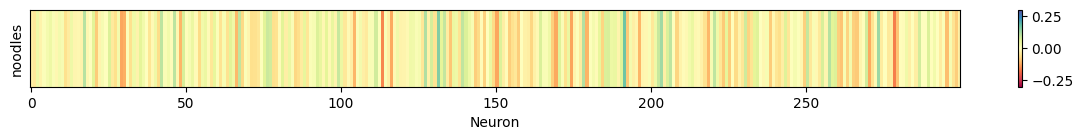

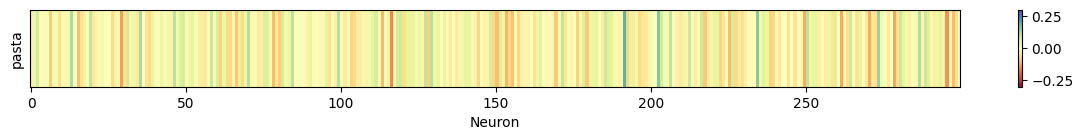

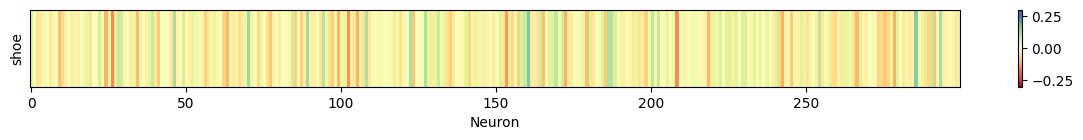

In [6]:
word1 = 'noodles'
word2 = 'pasta'
word3 = 'shoe'


word_vector1 = model.get_vector(word1, norm=True)
plot_vector(word_vector1)
plt.ylabel(word1)

word_vector2 = model.get_vector(word2, norm=True)
plot_vector(word_vector2)
plt.ylabel(word2)

word_vector3 = model.get_vector(word3, norm=True)
plot_vector(word_vector3)
plt.ylabel(word3)

For each word, we can find the most similar vectors:

In [7]:
model.most_similar('noodles', topn=5)

[('noodle', 0.6829882264137268),
 ('pasta', 0.634353756904602),
 ('vermicelli', 0.6315168738365173),
 ('tofu', 0.6053614616394043),
 ('cooked', 0.6040924787521362)]

In [8]:
model.most_similar('shoe', topn=5)

[('shoes', 0.7242045402526855),
 ('footwear', 0.5965994000434875),
 ('sneaker', 0.5847949981689453),
 ('sneakers', 0.5435681343078613),
 ('clothing', 0.5319083333015442)]

### Word calculations

We can combine word vectors with addition/subtraction.

For example we can calculate the new word vector `berlin` - `germany` + `italy`

In [ ]:
model.most_similar(positive=['berlin', 'italy'], negative=['germany'], topn=1)

[('rome', 0.7019403576850891)]

Text(0, 0.5, 'rome')

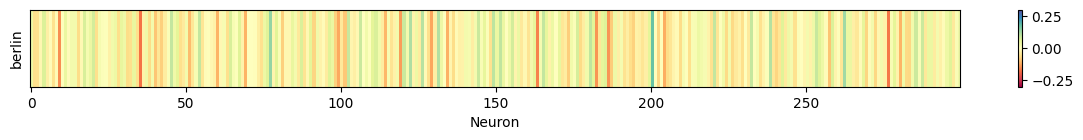

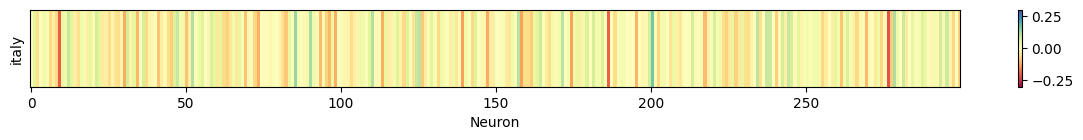

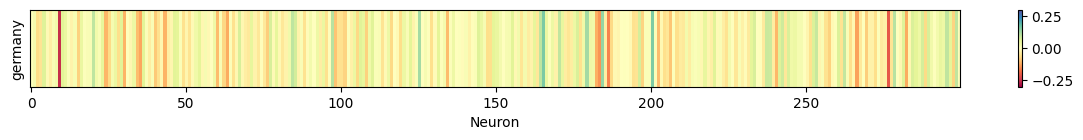

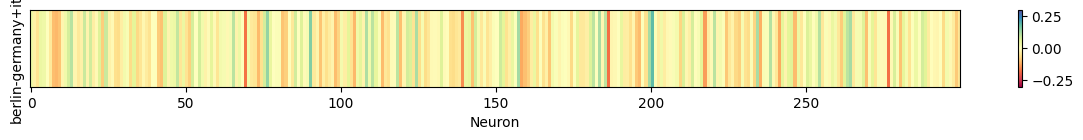

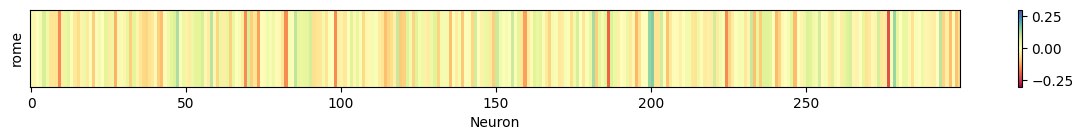

In [12]:
berlin_vector = model.get_vector('berlin', norm=True)
plot_vector(berlin_vector)
plt.ylabel('berlin')

italy_vector = model.get_vector('italy', norm=True)
plot_vector(italy_vector)
plt.ylabel('italy')

germany_vector = model.get_vector('germany', norm=True)
plot_vector(germany_vector)
plt.ylabel('germany')

calculated_vector = berlin_vector + italy_vector - germany_vector
plot_vector(calculated_vector)
plt.ylabel('berlin-germany+italy')

rome_vector = model.get_vector('rome', norm=True)
plot_vector(rome_vector)
plt.ylabel('rome')

In [ ]:
model.most_similar(positive=['berlin', 'uk'], negative=['germany'], topn=1)

[('london', 0.5862621068954468)]

In [ ]:
model.most_similar(positive=['beer', 'italy'], negative=['germany'], topn=1)

[('wine', 0.5321523547172546)]

In [ ]:
model.most_similar(positive=['beer', 'russia'], negative=['germany'], topn=1)

[('vodka', 0.5345780849456787)]


#### Task:

Find some exmaples for word vector calculation that work well (it does not always work well)